In [4]:
!pip install "clustpy[full]"

In [1]:
from utils.datasets import dataset_loader
from utils import datasets

from models.FeedForward import FeedForward
from models.AlexNet import AlexNet
from deepcluster import DeepCluster

#from sklearn.manifold import TSNE
from openTSNE import TSNE
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

from torch.nn import CrossEntropyLoss
import torch
from torchvision import transforms
import numpy as np

In [2]:
# Loss Function
loss_fn = CrossEntropyLoss()

# Cluster Assignment Transformer
ca_tf = dataset_loader("USPS", './data', 32)
ca_tf = transforms.Compose(ca_tf)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = AlexNet(input_dim=1, num_classes=10, sobel=False).to(device)

 # Optimizer
model_optimizer = torch.optim.SGD(
    filter(lambda x: x.requires_grad, model.parameters()),
    lr=0.001,
    momentum=0.9,
    weight_decay=10 ** -5,
)

# Optimizer_TL
tl_optimizer = torch.optim.SGD(
    model.top_layer.parameters(),
    lr=0.001,
    weight_decay=10 ** -5,
)

train_loader = dataset_loader("USPS", './data', 32)

epochs = 1

k = 10

ca_tf = datasets.BASE_CA_TRANSFORM
ca_tf = transforms.Compose(ca_tf)

# Define DeepCluster Model
DeepCluster_Model = DeepCluster(
    model=model,
    optim=model_optimizer,
    optim_tl=tl_optimizer,
    loss_criterion=loss_fn,
    cluster_assign_tf=ca_tf,
    dataset_name="USPS",
    checkpoint=None,
    epochs=epochs,
    batch_size=32,
    k=k,
    verbose=True,
    pca_method='sklearn',
    pca_reduction=256,
    pca_whitening=True,
    clustering_method='sklearn',
    metrics=False,
    metrics_file=None,
    metrics_metadata=""
)

DeepCluster_Model.fit(train_loader)

print('Done!')

Loading dataset...
Done loading...
Loading dataset...
Done loading...
========================= Epoch 1 =========================


Computing Features: 100%|██████████| 63/63 [00:04<00:00, 14.05it/s]


hier (2007,)


Training: 100%|██████████| 63/63 [00:06<00:00,  9.66it/s]


Accuracy Torcheval: accuracy_metric.compute()=tensor(0.2536)
-------------------- Results --------------------
Average loss: 1.963071584701538
Accuracy: 0.2530624568462372
--------------------------------------------------
Normalized Mutual Information Scores:
- True labels and computed features at epoch 1: 0.3022412435971856
--------------------------------------------------
Label occurences:
- True labels: {0: 359, 1: 264, 2: 198, 3: 166, 4: 200, 5: 160, 6: 170, 7: 147, 8: 166, 9: 177}
- Computed labels: {0: 538, 1: 88, 2: 66, 3: 158, 4: 78, 5: 136, 6: 141, 7: 545, 8: 216, 9: 41}
--------------------------------------------------
A new best model has been found:
- Previous model: 0.0
- Current model: 0.2530624568462372
Saving the current checkpoint at epoch 1..
Creating new checkpoint..
Saving the current checkpoint at epoch 1..
Finished storing checkpoint
Done!


In [5]:
ca_tf(train_loader.dataset.)


TypeError: Unexpected type <class 'torchvision.datasets.usps.USPS'>

In [3]:
train_loader.dataset.data.shape

(2007, 16, 16)

C:\Users\Lights\AppData\Local\Temp\ipykernel_7016\3630136924.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


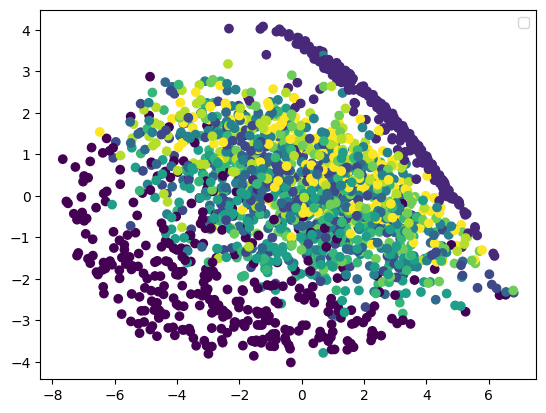

C:\Users\Lights\AppData\Local\Temp\ipykernel_7016\3630136924.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


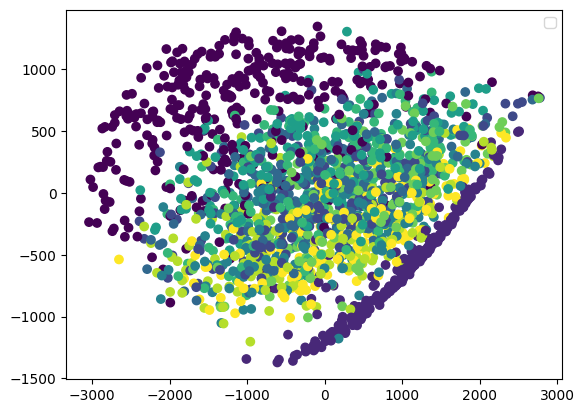

C:\Users\Lights\AppData\Local\Temp\ipykernel_7016\3630136924.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


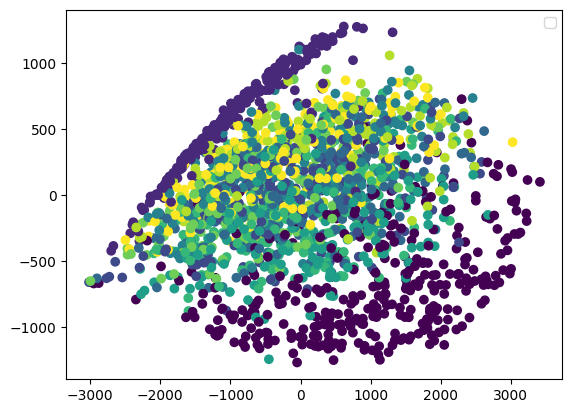

C:\Users\Lights\AppData\Local\Temp\ipykernel_7016\3630136924.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


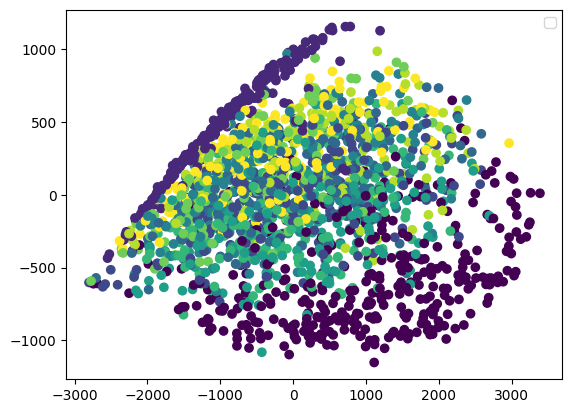

C:\Users\Lights\AppData\Local\Temp\ipykernel_7016\3630136924.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


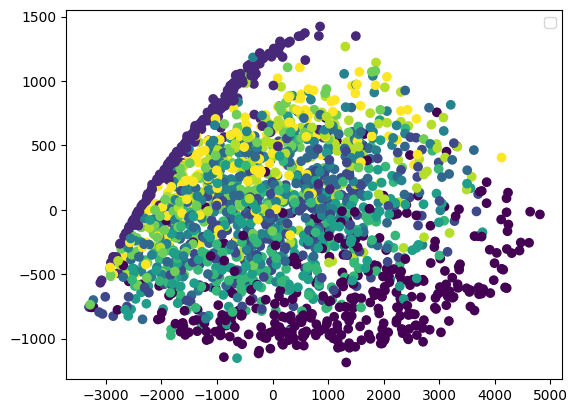

In [6]:
features_per_epoch = DeepCluster_Model.get_features_per_epoch()

for feat in features_per_epoch:
    pca = PCA(n_components=2)
    feat_pca = pca.fit_transform(feat)

    plt.scatter(feat_pca[:,0], feat_pca[:,1], c=train_loader.dataset.targets)
    plt.legend()
    plt.show() 

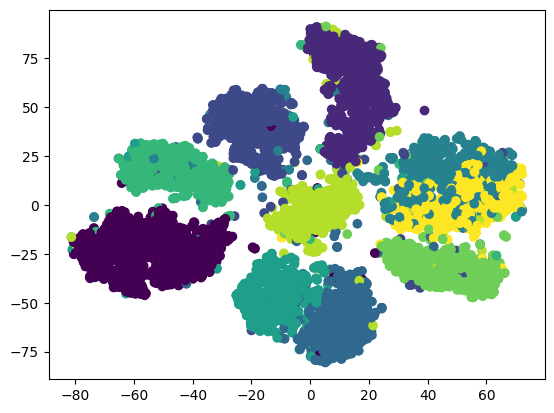

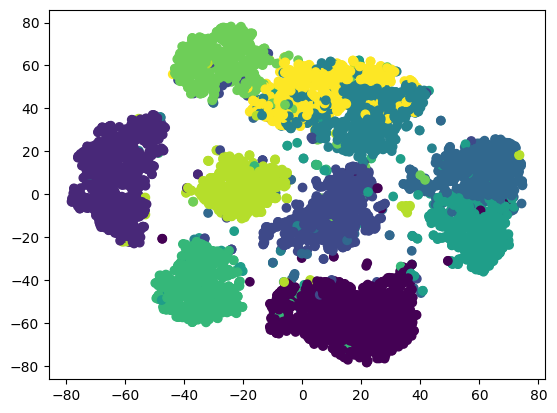

In [18]:
features_per_epoch = DeepCluster_Model.get_features_per_epoch()

for feat in features_per_epoch:
    pca = TSNE(n_components=2)
    feat_pca = pca.fit_transform(feat)

    plt.scatter(feat_pca[:,0], feat_pca[:,1], c=train_loader.dataset.targets)
    plt.show()

In [25]:
features_per_epoch = DeepCluster_Model.get_features_per_epoch()

pca = TSNE(n_components=2)
feat_pca = pca.fit_transform(features_per_epoch[-1])

plt.scatter(feat_pca[:,0], feat_pca[:,1], c=train_loader.dataset.targets)
plt.legend(train_loader.dataset.targets)
plt.show()

KeyboardInterrupt: 

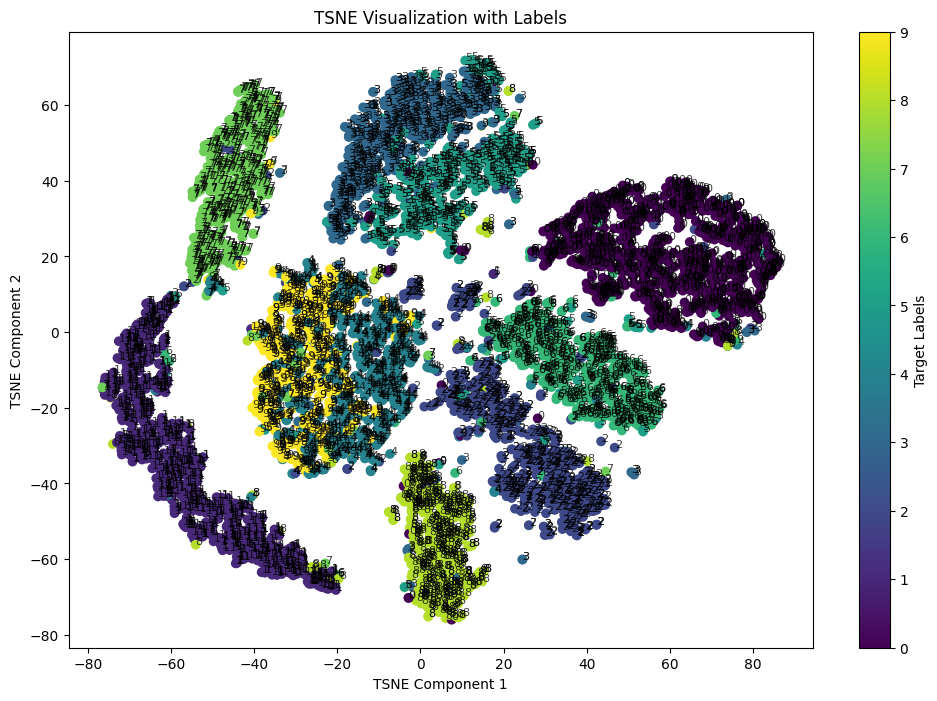

In [27]:
# Assuming features_per_epoch is already obtained
features_per_epoch = DeepCluster_Model.get_features_per_epoch()

# Perform TSNE transformation
tsne = TSNE(n_components=2)
feat_tsne = tsne.fit_transform(features_per_epoch[-1])

# Scatter plot
plt.figure(figsize=(12, 8))
scatter = plt.scatter(feat_tsne[:, 0], feat_tsne[:, 1], c=train_loader.dataset.targets, cmap='viridis')

# Add labels to the points
labels = train_loader.dataset.targets  # Assuming this is a list of labels
for i, label in enumerate(labels):
    plt.annotate(label, (feat_tsne[i, 0], feat_tsne[i, 1]), fontsize=8, alpha=0.75)

plt.colorbar(scatter, label='Target Labels')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Visualization with Labels')
plt.show()

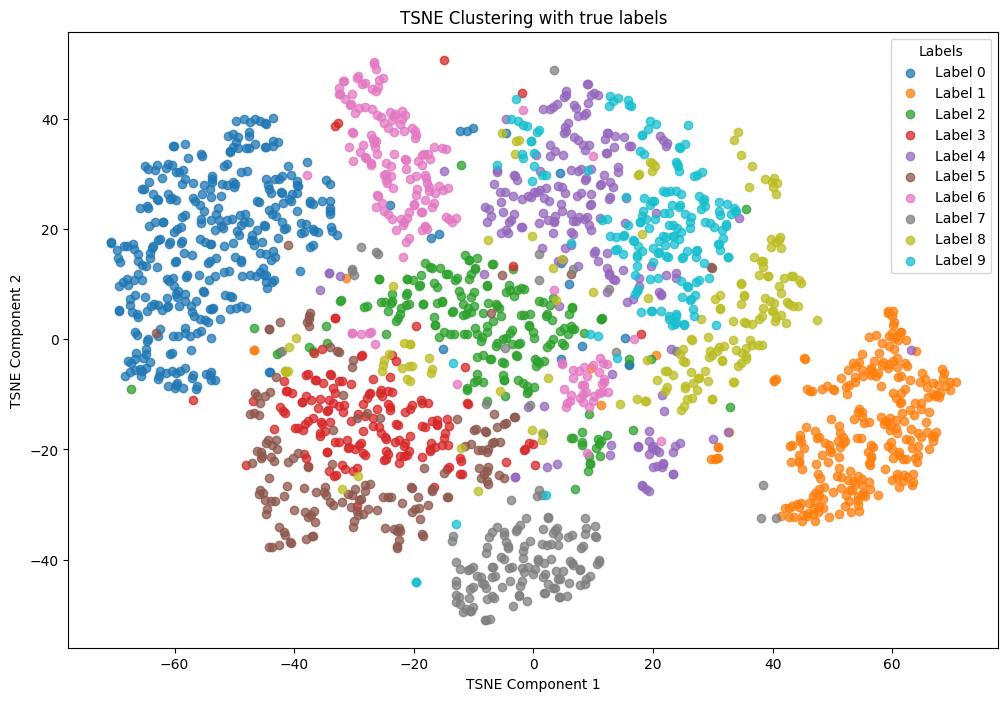

In [3]:
# Assuming features_per_epoch is already obtained
features_per_epoch = DeepCluster_Model.get_features_per_epoch()

# Perform TSNE transformation
tsne = TSNE(n_components=2)
feat_tsne_fit = tsne.fit(features_per_epoch[-1])
feat_tsne = feat_tsne_fit.transform(features_per_epoch[-1])

# Get unique labels
labels = train_loader.dataset.targets
unique_labels = np.unique(labels)

# Create scatter plot with a different color for each label
plt.figure(figsize=(12, 8))
for label in unique_labels:
    idx = np.where(labels == label)
    plt.scatter(feat_tsne[idx, 0], feat_tsne[idx, 1], label=f'Label {label}', alpha=0.75)

# Add legend
plt.legend(title='Labels')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Clustering with true labels')
plt.show()

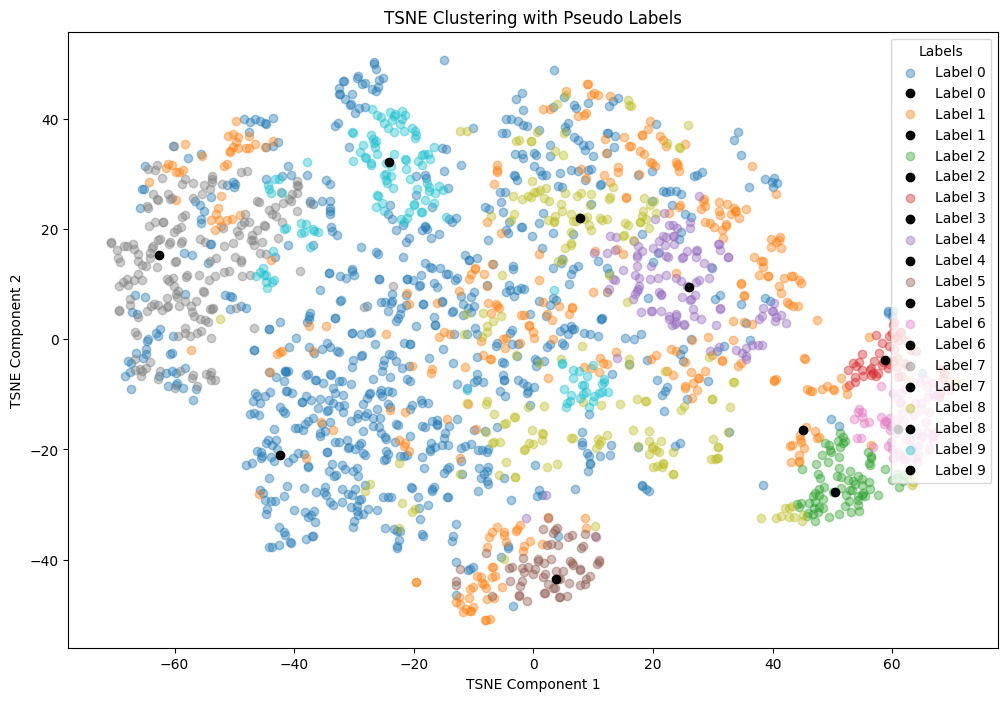

In [8]:
# Get unique labels
centroids = DeepCluster_Model.centroids_per_epoch[-1]
centroids_tsne = feat_tsne_fit.transform(centroids)

pseudo_labels = DeepCluster_Model.pseudo_labels_per_epoch[-1]
unique_labels = np.unique(pseudo_labels)

# Create scatter plot with a different color for each label
plt.figure(figsize=(12, 8))
for label in unique_labels:
    idx = np.where(pseudo_labels == label)
    plt.scatter(feat_tsne[idx, 0], feat_tsne[idx, 1], label=f'Label {label}', alpha=0.4)
    plt.scatter(centroids_tsne[label, 0], centroids_tsne[label, 1], label=f'Label {label}', alpha=1, c='black')

# Add legend
plt.legend(title='Labels')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.title('TSNE Clustering with Pseudo Labels')
plt.show()

In [12]:
centroids = DeepCluster_Model.centroids_per_epoch[-1]
print(centroids.shape)
#centroids_fit = feat_tsne_fit.transform(centroids)
print(features_per_epoch[-1].shape)


(10, 256)
(2007, 4096)
